# Gradient descent

Gradient descent is in essence an algorithm designed to minimize functions. It is popular in machine learning and statistics for use in minimizing loss functions such as least squares.

The gradient descent algorithim uses the derivative of the loss function to move in the direction where the loss function is "descending".

## 1. Derivatives

The derivative of a function measures the **rate of change** of the values of the function with respect to another quantity. 

We are not going to cover the calculus of derivatives today, but will give examples through explaining their use in gradient descent.

Imagine the derivative as a tangent line on the edge of another function. For example, in the image below, if the black curve was the velocity of a car, the red tangent would represent the derivative of velocity at that point, which is the acceleration of the car.

![derivative](https://camo.githubusercontent.com/2f70b084174b825e3ad88564301f9aaf46997fd3/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30662f54616e67656e745f746f5f615f63757276652e737667)



A derivative of a function indicates whether the function is **increasing or decreasing** based on the value of the derivative. 

* If the function is not changing (the tangent line is flat), **the derivative is 0**
* If the function is increasing (the tangent slope is positive), **the derivative is positive**
* If the function is decreasing (the tangent slope is negative), **the derivative is negative**

## 2. The least squares loss and regression

Recall the least squares loss from yesterday:

### $$\frac{1}{N}\sum_{i=1}^N{\left(y_i - \hat{y}_i\right)^2}$$

As well as the formula for a linear regression with a single predictor variable:

### $$y = \beta_0 + \beta_1x_1$$

We can redefine the loss function, inserting the regression formula:

### $$\frac{1}{N}\sum_{i=1}^N{\left(y_i - (\beta_0 + \beta_1x_i)\right)^2}$$

## 3. Partial derivatives of the loss functions

We are going to calculate the two **partial derivatives** of the loss function. Partial derivatives are derivatives with respect to one variable while keeping the other variables constant. Our partial derivatives will be:

* The derivative of the loss function with respect to beta0 (the intercept)
* The derivative of the loss function with respect to beta1 (the slope/coefficient for x1)

This is because the error function is defined by these two parameters. In other words, the value of the error function depends on the changes in beta0 and beta1. 

What about x and y? Those variables affect the calculation of the loss, but they are not changing.

(I've basically forgotten my calculus and differentiation, but I looked up the partial derivatives.)

**The partial derivative with respect to beta0:**

### $$\frac{\delta}{\delta\beta_0} = \frac{2}{N}\sum_{i=1}^N{-\left(y_i - (\beta_0 + \beta_1x_1)\right)}$$

**The partial derivative with respect to beta1:**

### $$\frac{\delta}{\delta\beta_1} = \frac{2}{N}\sum_{i=1}^N{-x_i\left(y_i - (\beta_0 + \beta_1x_1)\right)}$$


So what are we going to do with these partial derivatives?

Recall that a positive derivative indicates an increasing function and a negative derivative indicates a decreasing function. 

If we subtract a fraction of the partial derivative of beta1 from beta1, and subtract a fraction of the partial derivative of beta0 from beta0, we will modify beta1 and beta0 such that the value of the error function shrinks!

We can repeat this incremental process until we reach the minimum of the function.

This is called gradient descent because **we are iteratively moving down the gradient of the error function to its minimum.**

![](https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png)

## 4. Coding the gradient descent algorithm

We will now code the gradient descent algorithm to find the optimal intercept and slope for a least squares linear regression model with one predictor.

Load some packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### The mean squared error loss function

This function calculates the mean of the squared errors and will serve as our evaluator of the performace of our model:

In [2]:
def mean_squared_error(X, y, beta_array):
    y_hat = np.dot(X, beta_array)
    mean_sq_err = np.mean((y_true - y_hat)**2)
    return mean_sq_err

### $\beta$ update function

This will update the value of $\beta_0$. It is the code version of the partial derivitave formula above, with some linear algebra tweaks to make it work with an arbitary $X$ predictor matrix.

In [3]:
def beta_update_function(X, y, beta_array, step_size):
    # create a transposed version of the X predictor array:
    Xt = X.T
    
    # predictions are the dot product of the X matrix and the beta matrix:
    y_hat = np.dot(X, beta_array)
    
    # residuals are the true y minus the predicted y
    residuals = y_hat - y
    
    # calculate the gradient from the partial derivatives.
    # this works out to actually do both at the same time.
    # How? Well, because the beta0 column is all 1s, the 
    # dot product turns out to be the same as the beta0
    # partial derivative function!
    gradient = np.dot(Xt, residuals) / (X.shape[0]/2.)
    
    # update the betas with the gradient:
    beta_array = beta_array - (step_size * gradient)
    
    return beta_matrix

### Gradient descent iteration update function

This is the function that wraps the gradient update with some number of iterations.

I'm also keeping track of the mean squared error.

In [4]:
def run_gradient_descent(X, y, initial_beta_array, step_size, iterations=500):
    
    beta_array = initial_beta_array
    
    # Set up the MSE tracker
    mses = []
    mses.append(mean_squared_error(X, y, beta_array))
    
    # track the betas over the iterations:
    beta_arrays = []

    # update the betas via gradient descent:
    for i in range(iterations):
        beta_array = beta_update_function(X, y, beta_array, step_size)
        mses.append(mean_squared_error(X, y, beta_array))
        beta_arrays.append(beta_array)


### Visualize the gradient descent updates for regression

I made another interactive visualization where you can see the updates of gradient descent.

Because this is a very simple implementation, there is no automatic adjustment of step size, so setting this value can be finnicky and you sort of have to play around with it.

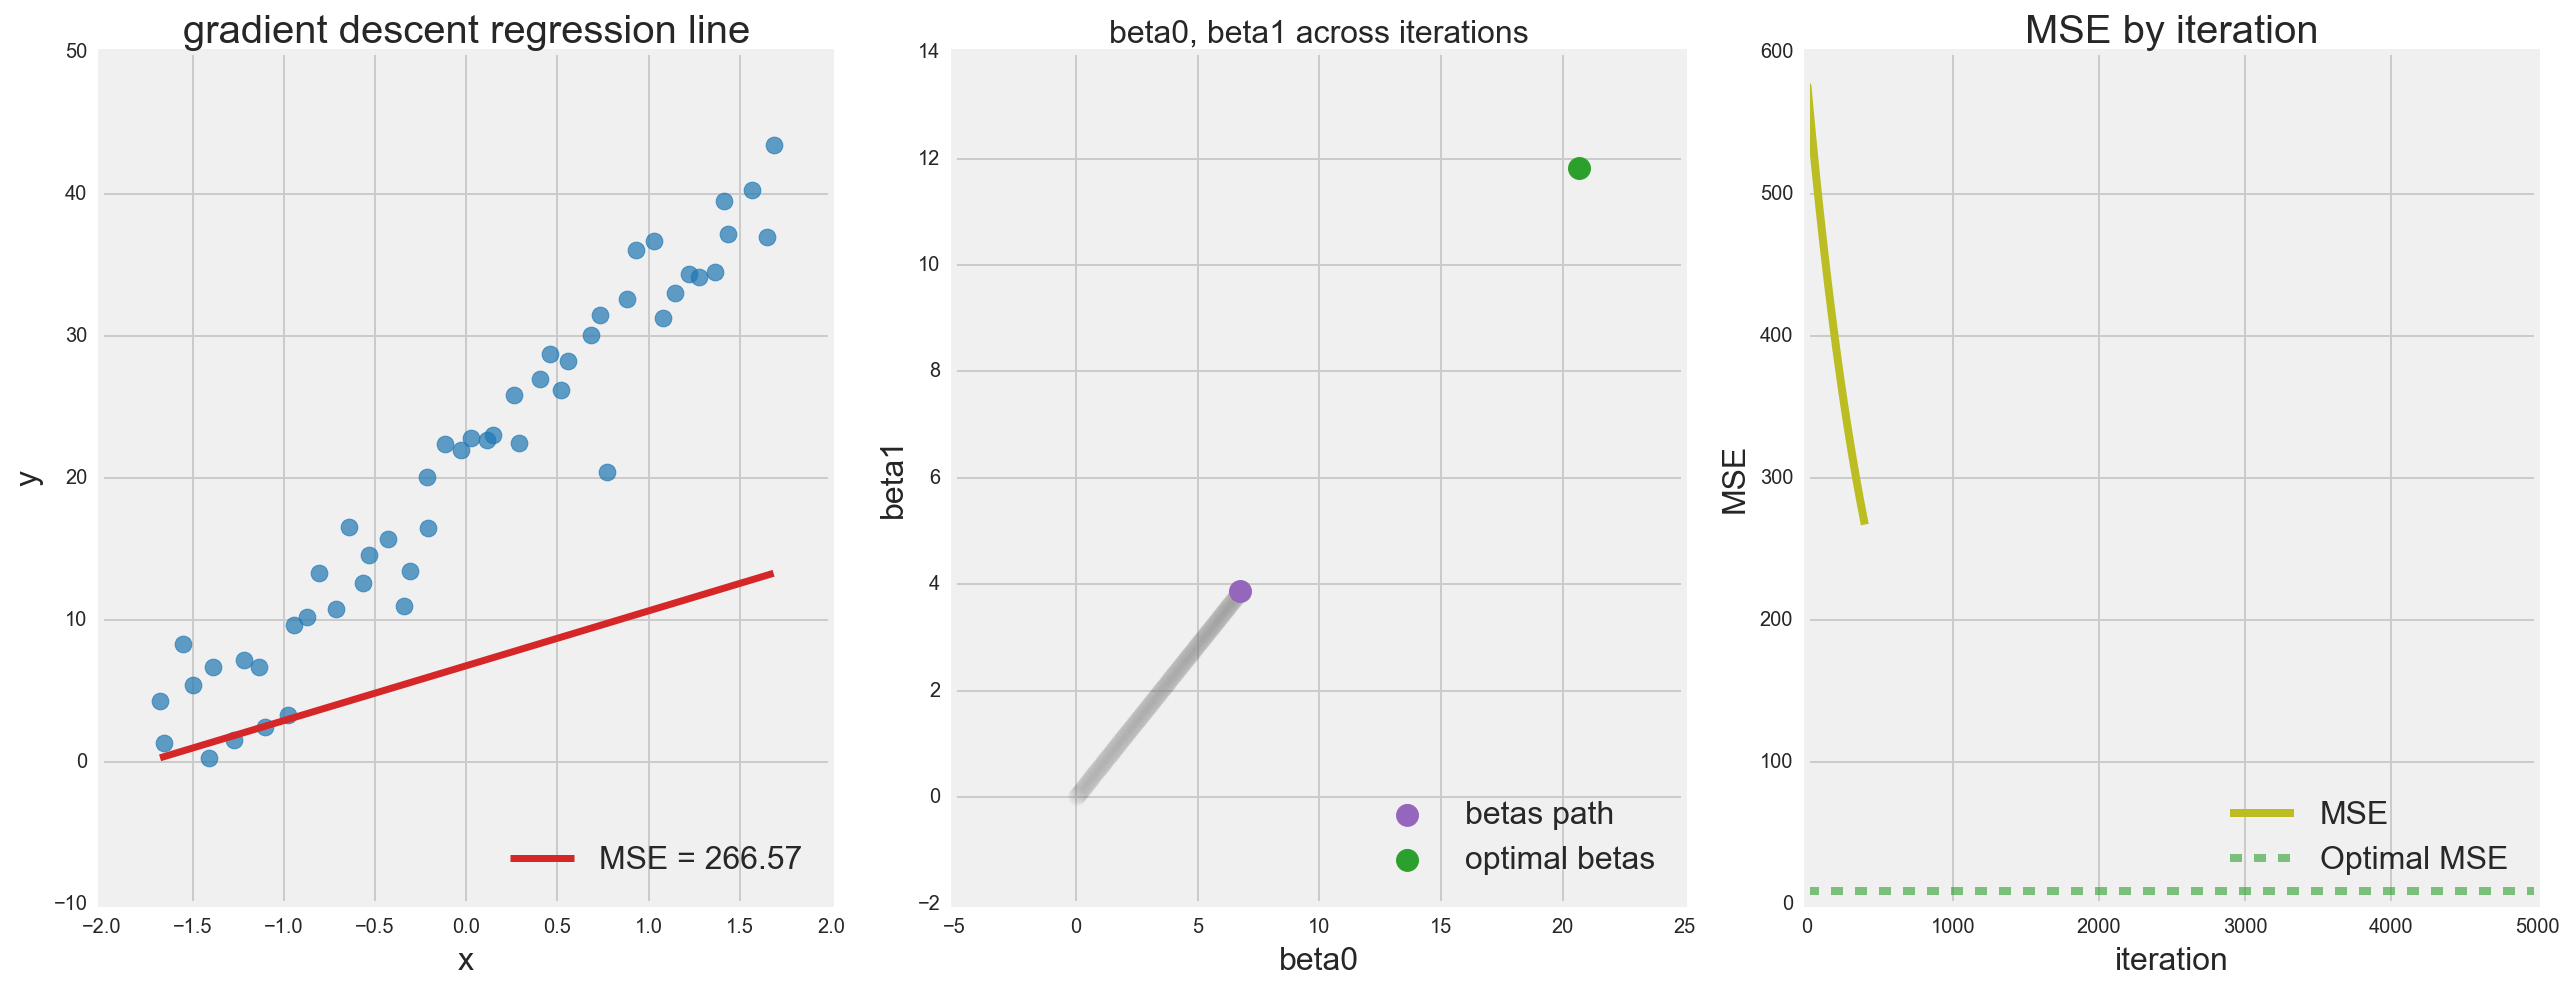

In [7]:
import imp
plotter = imp.load_source('plotter', '/Users/tlee010/desktop/DSI-SF-2-timdavidlee/utils/gradient_descent.py')
from plotter import GradientDescentPlotter

gd_plotter = GradientDescentPlotter(step_size=0.001)
gd_plotter.run_gradient_descent(iterations=5000)
gd_plotter.gradient_interact()

## 7.  Gradient descent can fail

One of the most fickle things about gradient descent is the step size (also known as learning rate). If this is not tuned properly, the algorithm may never converge and in fact explode into extreme values.

Gradient descent also only works where there is a gradient to follow. Here is a toy example of a function where gradient descent will fail:

$$f(x, y) = \begin{cases}
2 x^2 & \quad \text{if $x \leq 1$}\\
2  & \quad \text{else}
\end{cases}$$

Gradient descent code for the function:

In [7]:
def func(x):
    if x <= 1:
        return 2 * x * x
    return 2

def gradient(x):
    if x <= 1:
        return 4 * x
    return 0

def gradient_descent(x, l=0.1):
    vector = np.array(x)
    return vector - l * np.array(gradient(x))


def iterate(x0, n=10):
    xs = [x0]
    ys = [func(x0)]
    for i in range(n):
        x = gradient_descent(xs[-1], l=0.1)
        xs.append(x)
        ys.append(func(x))
    return xs, ys

Run the gradient descent algorithm starting at **x = -1.5** first, then try it at **x = 2**:

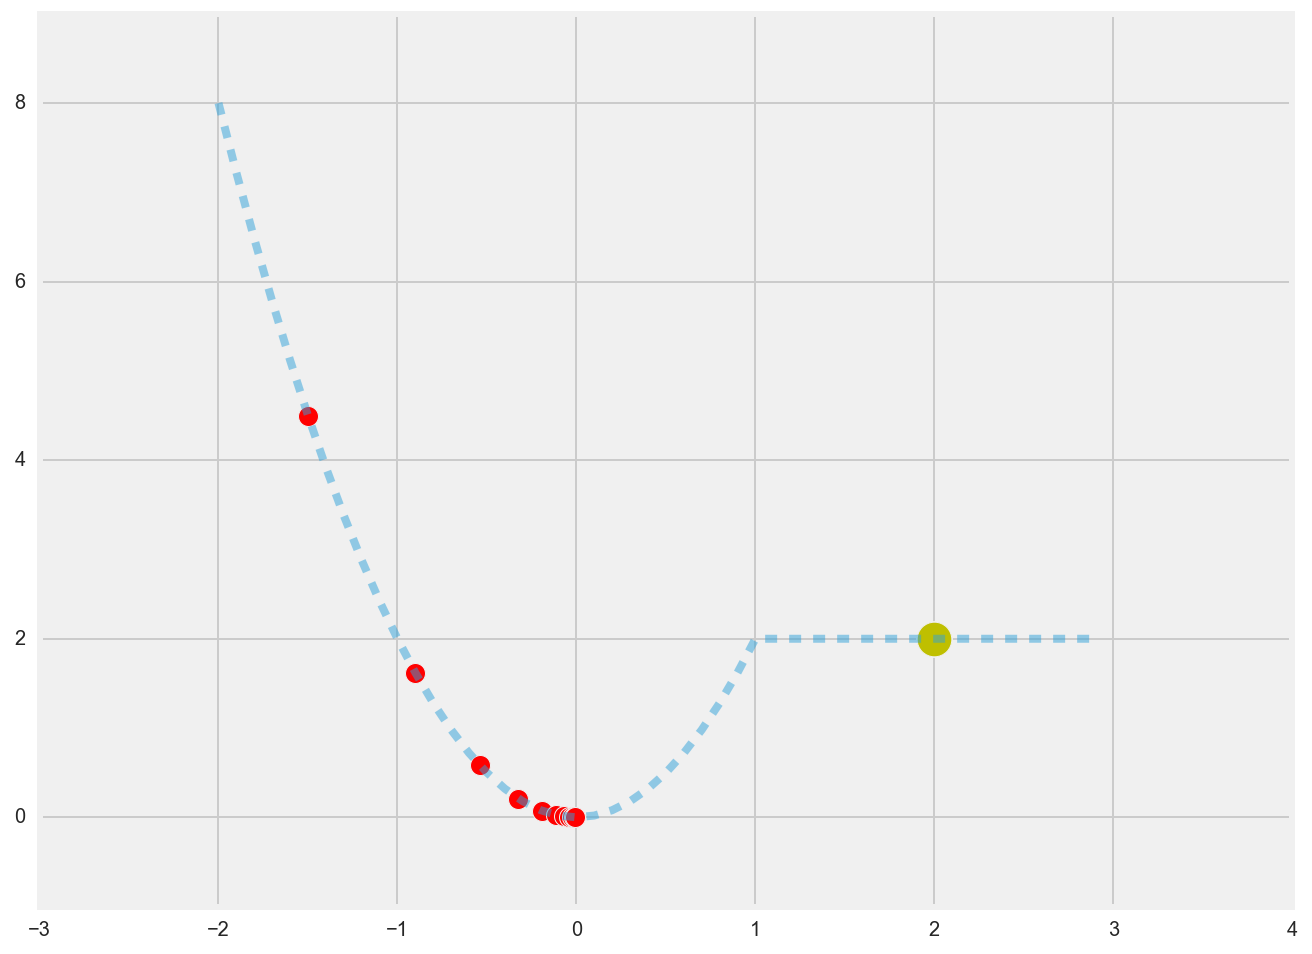

In [8]:
xs = np.arange(-2, 3, 0.1)
ys = map(func, xs)

plt.figure(figsize=(10,8))
plt.plot(xs, ys, alpha=0.5, ls='dashed')

# Start gradient descent at x = -1.5
xs2, ys2 = iterate(-1.5, n=10)
plt.scatter(xs2, ys2, c='r', s=100)

# Start gradient descent at x = 2
xs2, ys2 = iterate(2, n=10)
plt.scatter(xs2, ys2, c='y', s=300)

### Stochastic Gradient Descent

What is the difference between gradient descent and stochastic gradient descent? It's actually a very small difference, but has big implications.

Instead of **all** the samples updating the gradient at a time, **only one** sample updates the gradient (iterating over all the observations, though this can change based on specification) within each overall iteration.

Stochastic gradient descent has some nice properties over gradient descent:

- It solves faster since it immediately starts to update the gradient.
- It can handle much, much larger datasets since it only needs to calculate a single row or small batch of rows of the entire dataset.

The downside is that the MSE may not converge to an optimal value as well, since local minima become more likely. However, it typically _does_ converge to an optimal, so this risk is a small one. 